In [59]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, zero_one_loss, recall_score,classification_report,confusion_matrix,precision_score,f1_score
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
vote_df=pd.read_csv('BlueOrRed.csv')  
vote_df.head()


,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church,Undecided
0,51,1,1,1,4,171.0,15,0,1
1,46,1,1,1,6,420.0,15,1,0
2,55,1,0,1,6,132.0,16,0,1
3,50,1,0,1,4,18.0,8,0,0
4,49,1,1,1,2,66.0,15,1,1


In [79]:
pd.isna(vote_df).sum()

Age              0
HomeOwner        0
Female           0
Married          0
HouseholdSize    0
Income           0
Education        0
Church           0
Undecided        0
dtype: int64

In [80]:
vote_df.columns

Index(['Age', 'HomeOwner', 'Female', 'Married', 'HouseholdSize', 'Income',
       'Education', 'Church', 'Undecided'],
      dtype='object')

In [81]:
mms = MinMaxScaler()
vote_df[['Age','HouseholdSize','Income','Education']]=mms.fit_transform(vote_df[['Age','HouseholdSize','Income','Education']])
vote_df.head()

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church,Undecided
0,0.523810,1,1,1,0.500000,0.306422,0.583333,0,1
1,0.444444,1,1,1,0.833333,0.763303,0.583333,1,0
2,0.587302,1,0,1,0.833333,0.234862,0.666667,0,1
3,0.507937,1,0,1,0.500000,0.025688,0.000000,0,0
4,0.492063,1,1,1,0.166667,0.113761,0.583333,1,1


In [82]:
target_vec =vote_df['Undecided']
vote_df.drop(columns=['Undecided'],inplace =True)
X_train, X_test, y_train, y_test = train_test_split(vote_df, target_vec, test_size=0.3, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)


(7000, 8) (3000, 8) (7000,) (3000,)


In [83]:
DT= DecisionTreeClassifier()
DT = DT.fit(X_train,y_train)
y_train_pred = DT.predict(X_train)
y_train_pred[:100]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [84]:

y_test_pred = DT.predict(X_test)
y_test_pred[:100]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [85]:
accuracy_score(y_train,y_train_pred) 

1.0

In [86]:
accuracy_score(y_test,y_test_pred) 

0.97

In [87]:
 DT.score(X_train, y_train)

1.0

In [88]:
 DT.score(X_test, y_test)

0.97

In [89]:
zero_one_loss(y_train,y_train_pred)

0.0

In [90]:
zero_one_loss(y_test,y_test_pred)

0.030000000000000027

In [91]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4172
           1       1.00      1.00      1.00      2828

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



In [92]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1814
           1       0.96      0.97      0.96      1186

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



In [93]:
confusion_matrix(y_train,y_train_pred)

array([[4172,    0],
       [   0, 2828]], dtype=int64)

In [94]:
confusion_matrix(y_test,y_test_pred)

array([[1765,   49],
       [  41, 1145]], dtype=int64)

In [95]:
precision_score(y_train,y_train_pred)

1.0

In [96]:
precision_score(y_test,y_test_pred)

0.958961474036851

In [97]:
recall_score(y_train,y_train_pred)

1.0

In [98]:
recall_score(y_test,y_test_pred)

0.9654300168634065

In [99]:
f1_score(y_train,y_train_pred)

1.0

In [100]:
f1_score(y_test,y_test_pred)

0.9621848739495799

C:\Users\ethan\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


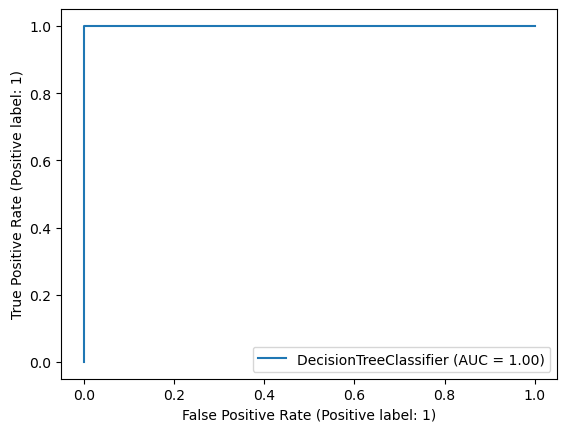

In [22]:
plot_roc_curve(DT, X_train, y_train) 

C:\Users\ethan\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


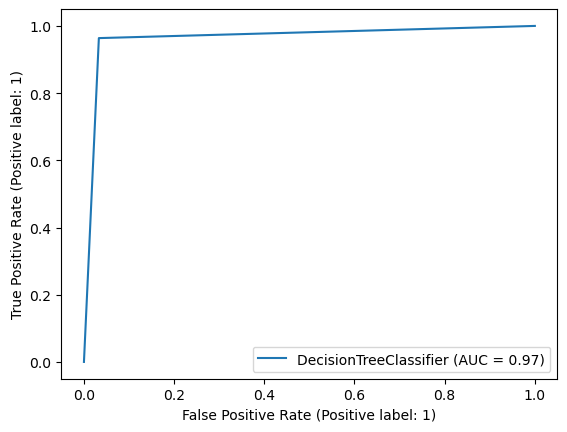

In [23]:
plot_roc_curve(DT, X_test, y_test) 

C:\Users\ethan\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


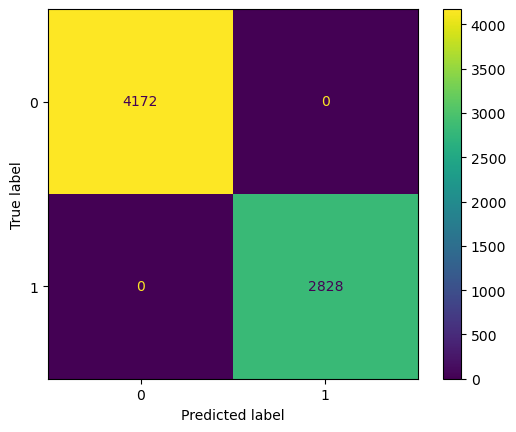

In [24]:
plot_confusion_matrix(DT, X_train, y_train) 

C:\Users\ethan\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


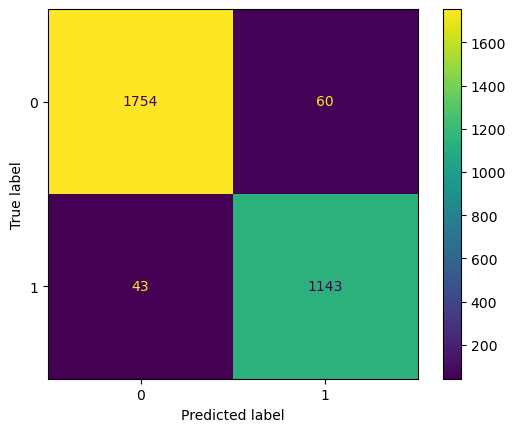

In [25]:
plot_confusion_matrix(DT, X_test, y_test) 

In [26]:
DT.tree_.max_depth 

18

In [27]:
er_list=[]
tree_depth=[]
for d in range (1,DT.tree_.max_depth):
    DT = DecisionTreeClassifier(max_depth=d)
    DT = DT.fit(X_train,y_train)
    er_list.append(1-DT.score(X_test,y_test))
    tree_depth.append(d)


<AxesSubplot:xlabel='DT_Depth', ylabel='Error_Rate'>

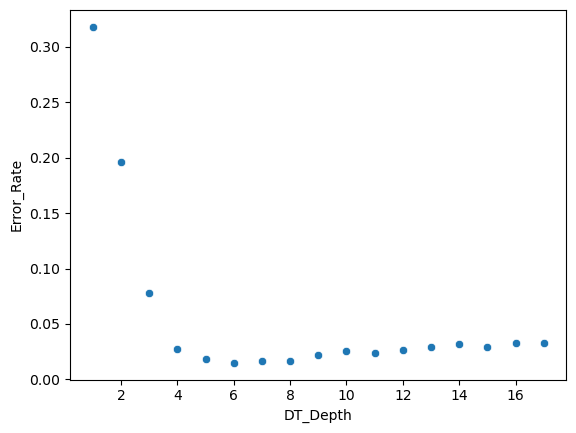

In [28]:
er_df = pd.DataFrame(list(zip(tree_depth, er_list)),
               columns =['DT_Depth', 'Error_Rate'])
sns.scatterplot(data=er_df, x="DT_Depth", y="Error_Rate")

In [29]:
np.argmin(er_df['Error_Rate']) 

5

In [30]:
params={"max_depth": range(1,DT.tree_.max_depth),"max_features":[.2,.4,.6,.8]}
DT_gs = GridSearchCV(DT, param_grid=params,scoring='accuracy',cv=8)
DT_gs = DT_gs.fit(X_train,y_train)
DT_gs.best_params_

{'max_depth': 7, 'max_features': 0.8}

In [31]:
cv_score_list=[]
tree_depth2=[]
for c in range (1,DT.tree_.max_depth):
    DT = DecisionTreeClassifier(max_depth=c)
    DT = DT.fit(X_train,y_train)
    cv_scores=cross_val_score(estimator=DT,X=X_train,y=y_train,scoring="accuracy",cv=8)
    cv_score_list.append(1-np.average(cv_scores))
    tree_depth2.append(c)


<AxesSubplot:xlabel='Max_Depth', ylabel='Error_Rate'>

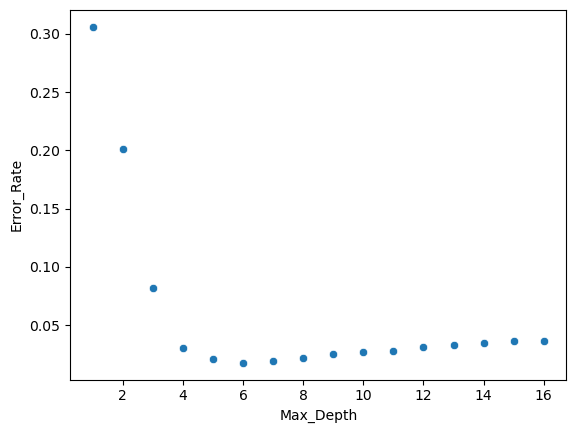

In [32]:
md_df = pd.DataFrame(list(zip(tree_depth2, cv_score_list)),
               columns =['Max_Depth', 'Error_Rate'])
sns.scatterplot(data=md_df, x="Max_Depth", y="Error_Rate")

In [33]:
np.argmin(md_df['Error_Rate']) 

5

In [34]:
parameter_range = np.arange(1, 15, 1)
train_score, test_score = validation_curve(DT, X_train, y_train, param_name="max_depth",param_range=parameter_range,cv = 8, scoring = "accuracy")
mean_train_score = np.mean(train_score, axis = 1)
mean_test_score = np.mean(test_score, axis = 1)


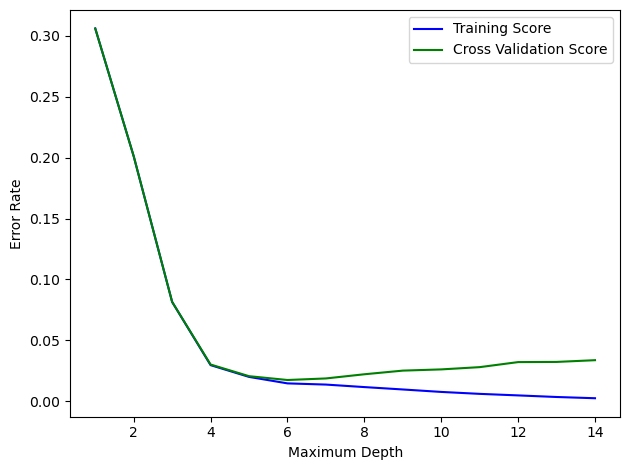

In [35]:
plt.plot(parameter_range, 1-mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, 1-mean_test_score,
   label = "Cross Validation Score", color = 'g')
plt.xlabel("Maximum Depth")
plt.ylabel("Error Rate")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [36]:
autism_df=pd.read_csv('toddler_autism.csv')  
autism_df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [37]:
autism_df.drop(columns=['Case_No','Qchat-10-Score', 'Who completed the test','A1','A2','A3','A4','A5','A6','A7','A8','A9','A10'], inplace=True)

In [38]:
autism_df=pd.get_dummies(autism_df, columns=['Sex', 'Jaundice','Class/ASD Traits ','Family_mem_with_ASD'],drop_first=True)
autism_df['Ethnicity'].value_counts()


White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
mixed               8
Pacifica            8
Native Indian       3
Name: Ethnicity, dtype: int64

In [39]:
autism_df.drop(columns=['Ethnicity'],inplace=True)
pd.isna(autism_df).sum()



Age_Mons                   0
Sex_m                      0
Jaundice_yes               0
Class/ASD Traits _Yes      0
Family_mem_with_ASD_yes    0
dtype: int64

<AxesSubplot:xlabel='Age_Mons'>

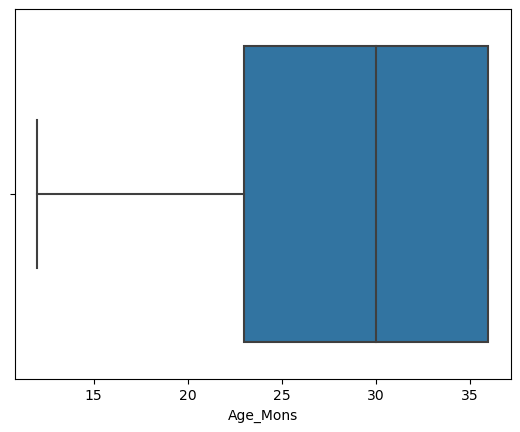

In [40]:
sns.boxplot(x=autism_df["Age_Mons"])

In [41]:
autism_df['Age_Mons']=mms.fit_transform(autism_df[['Age_Mons']])



In [42]:
autism_df.head()

,Age_Mons,Sex_m,Jaundice_yes,Class/ASD Traits _Yes,Family_mem_with_ASD_yes
0,0.666667,0,1,0,0
1,1.000000,1,1,1,0
2,1.000000,1,1,1,0
3,0.500000,1,0,1,0
4,0.333333,0,0,1,1


In [43]:
asd_vec =autism_df['Class/ASD Traits _Yes']
autism_df.drop(columns=['Class/ASD Traits _Yes'],inplace =True)
X2_train, X2_test, y2_train, y2_test = train_test_split(autism_df, asd_vec, test_size=0.3, random_state=42)

In [44]:

DT2 = DT.fit(X2_train,y2_train)
y2_train_pred = DT2.predict(X2_train)
accuracy_score(y2_train,y2_train_pred) 

0.7544097693351425

In [45]:
y2_test_pred = DT2.predict(X2_test)
accuracy_score(y2_test,y2_test_pred) 

0.6813880126182965

In [46]:
rf= RandomForestClassifier()
rf = rf.fit(X2_train,y2_train)
y3_train_pred = rf.predict(X2_train)
accuracy_score(y2_train,y3_train_pred) 

0.7544097693351425

In [47]:
y4_test_pred = rf.predict(X2_test)
accuracy_score(y2_test,y4_test_pred) 

0.7129337539432177

In [48]:
params2={"max_depth": range(1,DT2.tree_.max_depth),"max_features":[.2,.4,.6,.8]}
DT2_gs = GridSearchCV(DT2, param_grid=params,scoring='accuracy',cv=8)
DT2_gs = DT2_gs.fit(X2_train,y2_train)
DT2_gs.best_params_

{'max_depth': 5, 'max_features': 0.8}

In [49]:
DT3=DecisionTreeClassifier(max_depth= 2,max_features=0.6)
DT3 = DT3.fit(X2_train,y2_train)
y4_train_pred = DT2.predict(X2_train)
accuracy_score(y2_train,y4_train_pred) 

0.7544097693351425

In [50]:
y4_test_pred = DT3.predict(X2_test)
accuracy_score(y2_test,y4_test_pred) 

0.6908517350157729

In [56]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 150, num = 10)]
rf_grid = {'n_estimators': n_estimators}
rf_gs = GridSearchCV(rf, param_grid=rf_grid,scoring='accuracy',cv=8)
rf_gs = rf_gs.fit(X2_train,y2_train)
rf_gs.best_params_

{'n_estimators': 118}

In [57]:
rf2=RandomForestClassifier(max_depth= 8,max_features=0.6,n_estimators= 118)
rf2 = rf2.fit(X2_train,y2_train)
y5_train_pred = rf2.predict(X2_train)
accuracy_score(y2_train,y5_train_pred) 

0.751696065128901

In [58]:
y5_test_pred = rf2.predict(X2_test)
accuracy_score(y2_test,y5_test_pred) 

0.7160883280757098